<center><h1>Hoffman_Kayla_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [45]:
import os 
import math
import numpy as np 
import pandas as pd 
from scipy.io import arff
import matplotlib.pyplot as plt

import seaborn as sns
from itertools import combinations

# Tried to standardize the data during the preprocessing phase. Had issues so decided not to do so.
#from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report




#### Get the Vertebral Column Data Set

In [8]:
## Note: Used Perplexity AI in order to open the '.arff' file. 
# Get the current directory
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Specify the name of your .arff file
arff_filename = 'column_2C_weka.arff'

# Create the full path to the .arff file
file_path = os.path.join(current_dir, arff_filename)

# Load the .arff file
data, meta = arff.loadarff(file_path)

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Now you can work with your data in the df DataFrame
print(df.head())

print(df.tail())


   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis        class  
0      98.672917                 -0.254400  b'Abnormal'  
1     114.405425                  4.564259  b'Abnormal'  
2     105.985135                 -3.530317  b'Abnormal'  
3     101.868495                 11.211523  b'Abnormal'  
4     108.168725                  7.918501  b'Abnormal'  
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     3

#### Replace Labels Abnormal and Normal with 0 and 1

In [9]:
# Decode byte strings into ordinary strings
df['class'] = df['class'].str.decode("utf-8")

# Label class Normal=0 and class Abnormal=1
class_label = {"Normal": 0, "Abnormal": 1}

# Use pandas.DataFrame.replace to replace class label values
df2 = df.replace({'class': class_label})

df2

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

### Figure 1

Text(0.5, 1.02, 'Scatter Plots of the independent variables in the data')

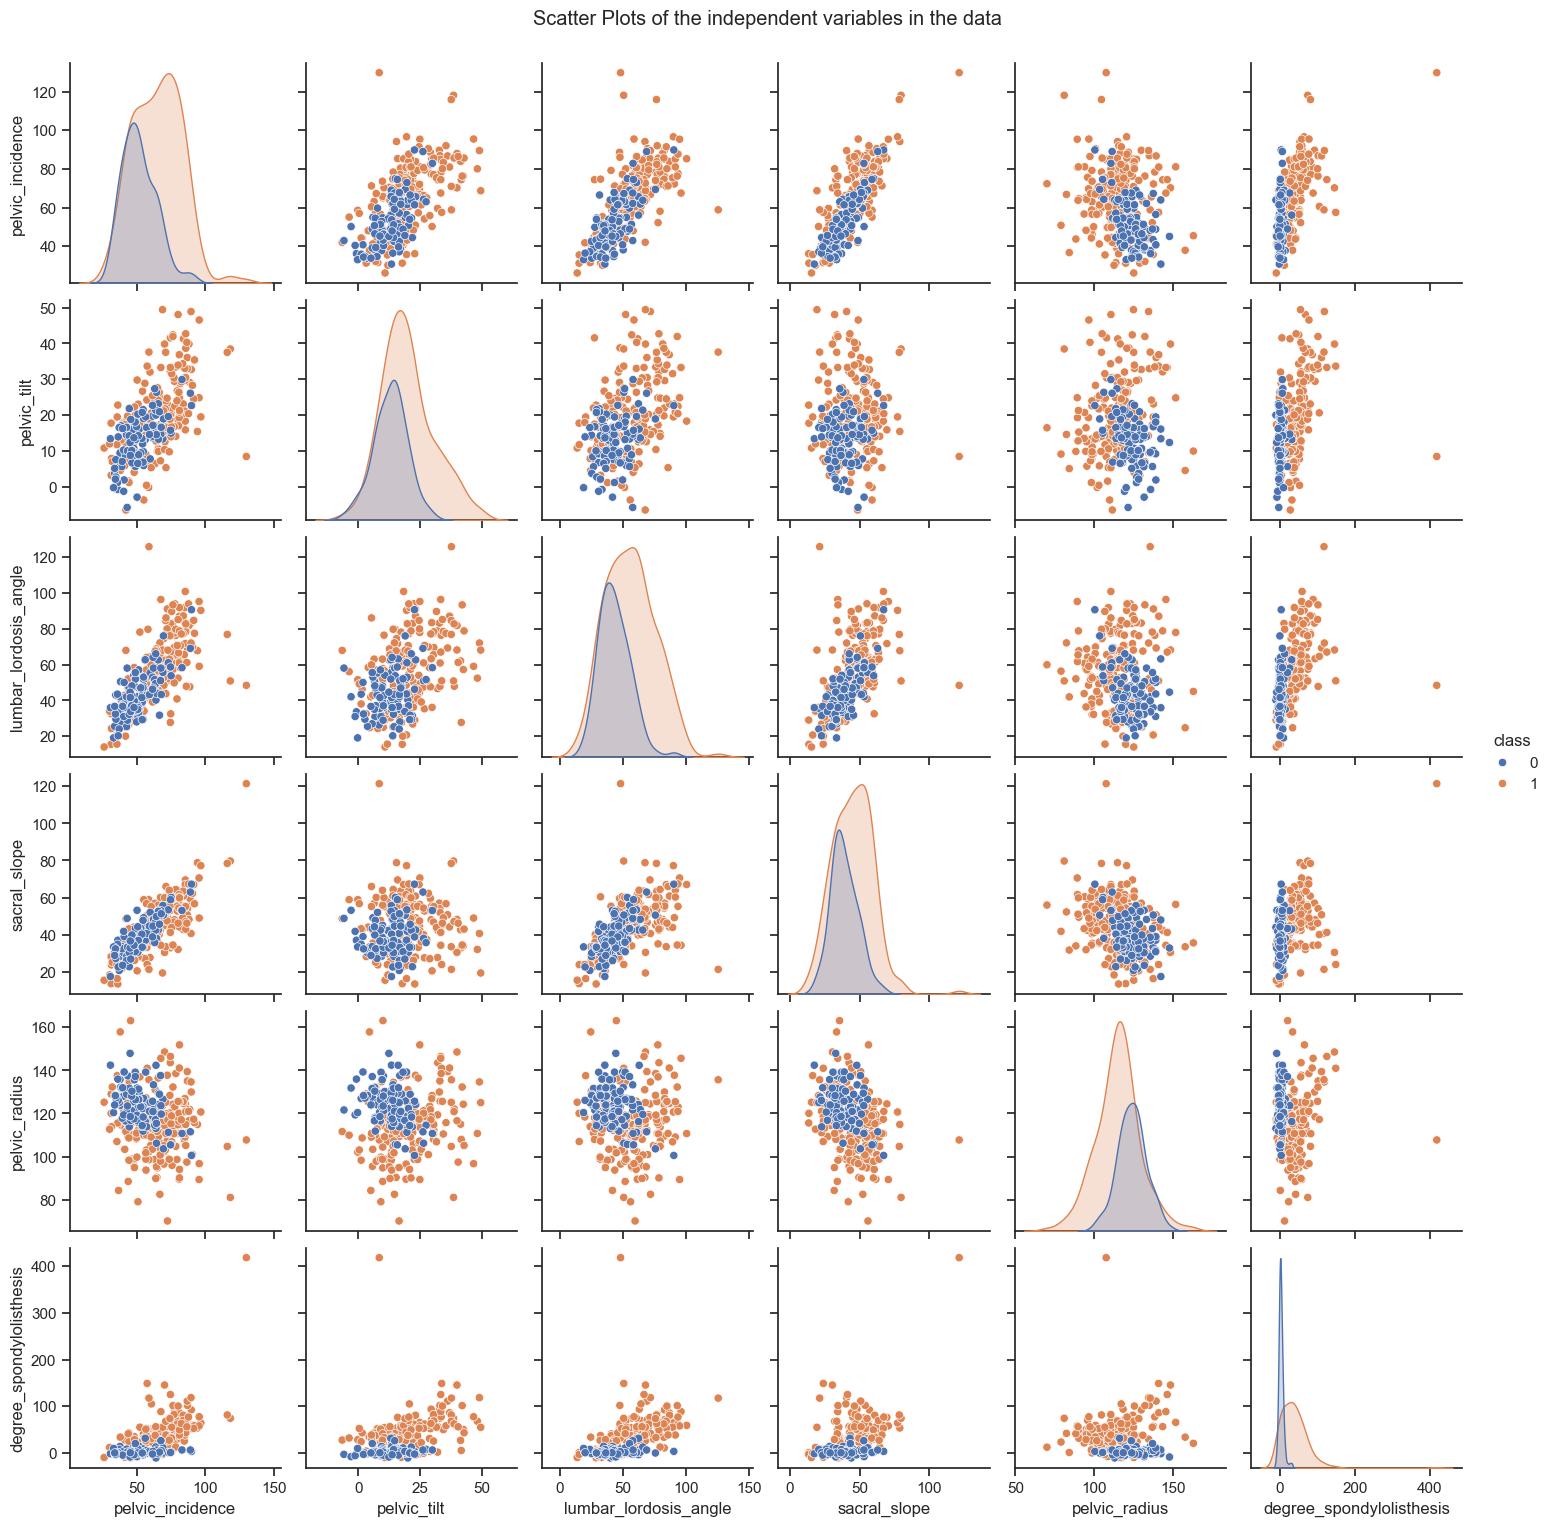

In [10]:
sns.set_theme(style = 'ticks')

a = sns.pairplot(data=df2, hue='class')
a.fig.suptitle("Scatter Plots of the independent variables in the data", y=1.02)

### Figure 2 
#### Additional scatterplot 

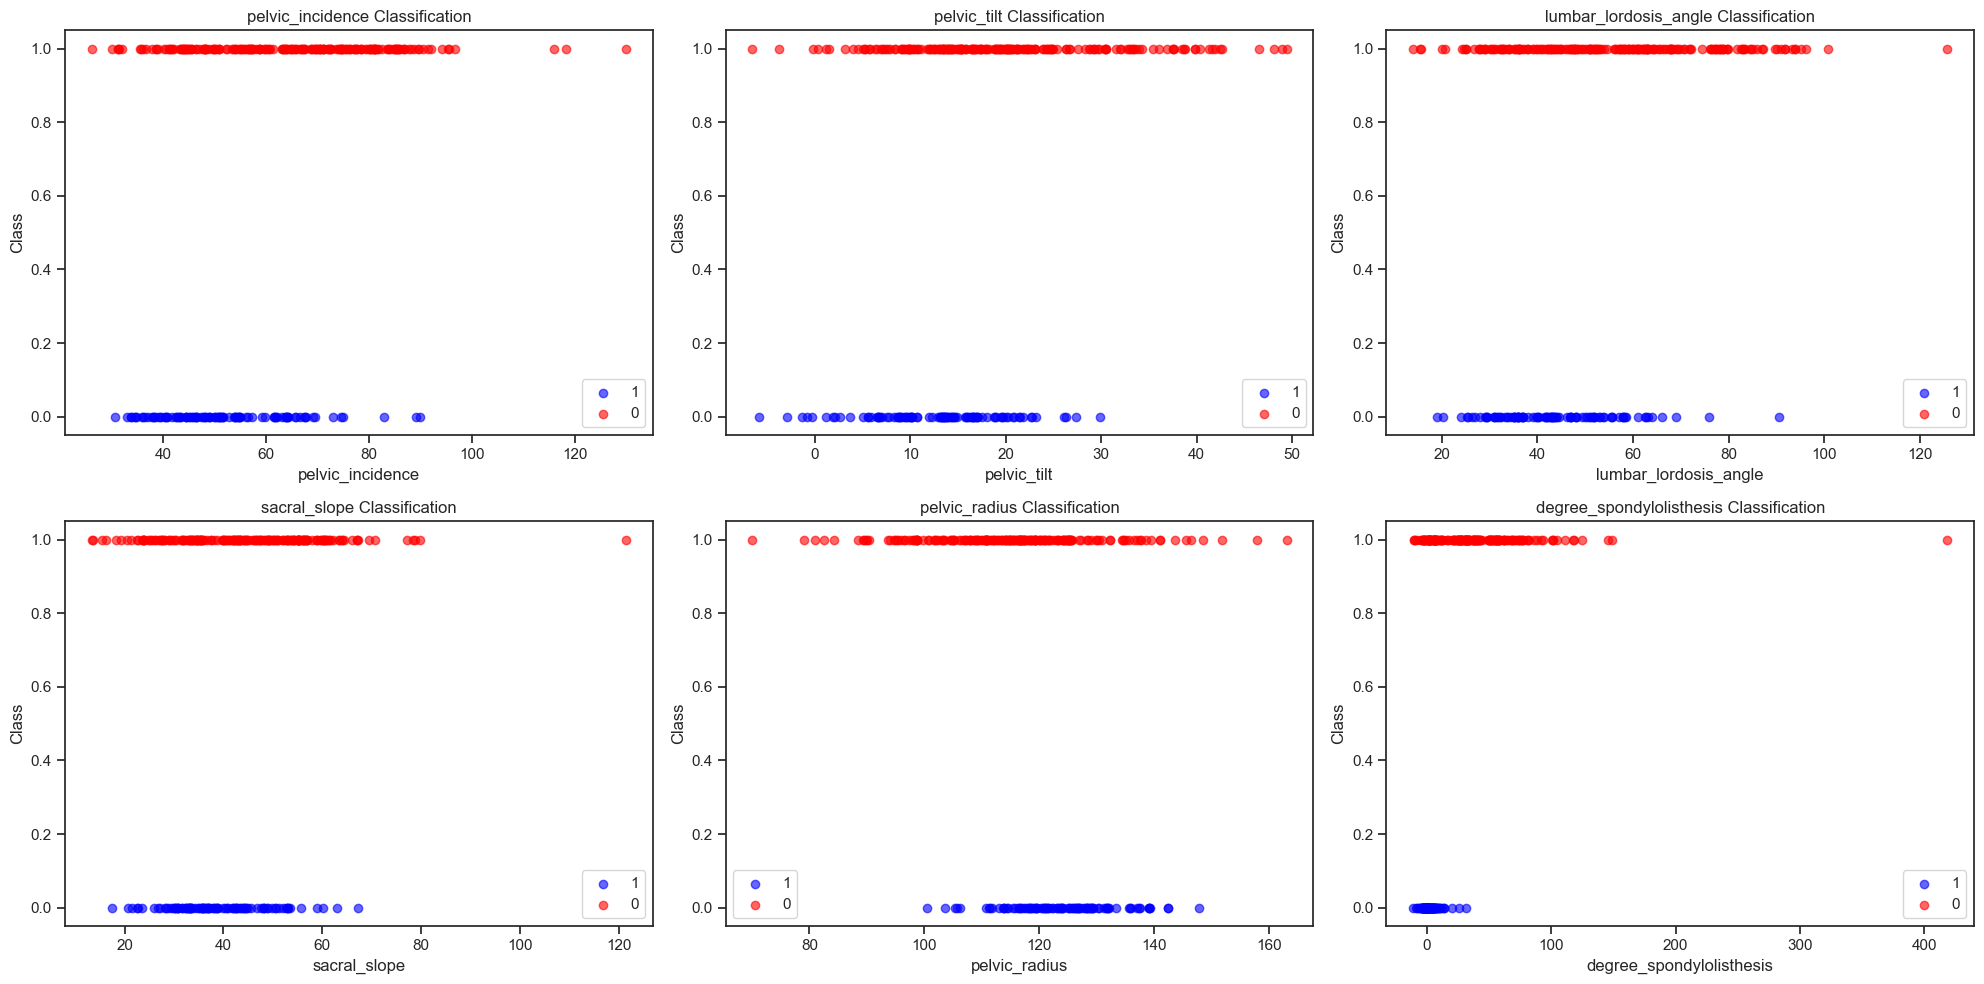

In [12]:
# List the six index features 
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

# Color map for the two classes
colors = {0: 'blue', 1: 'red'}
labels = {0: df2['class'].unique()[0], 1: df2['class'].unique()[1]}

# Create a 2x3 grid of subplots (6 plots for 6 features)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# Create scatterplots for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    for class_value in [0, 1]:
        mask = df2['class'] == class_value
        ax.scatter(df2.loc[mask, feature], [class_value]*len(df2.loc[mask, feature]), 
                   c=colors[class_value], label=labels[class_value], alpha=0.6)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Class')
    ax.set_title(f'{feature} Classification')
    ax.legend()

plt.tight_layout()
plt.show()


#### ii. Figure 3 - Boxplots

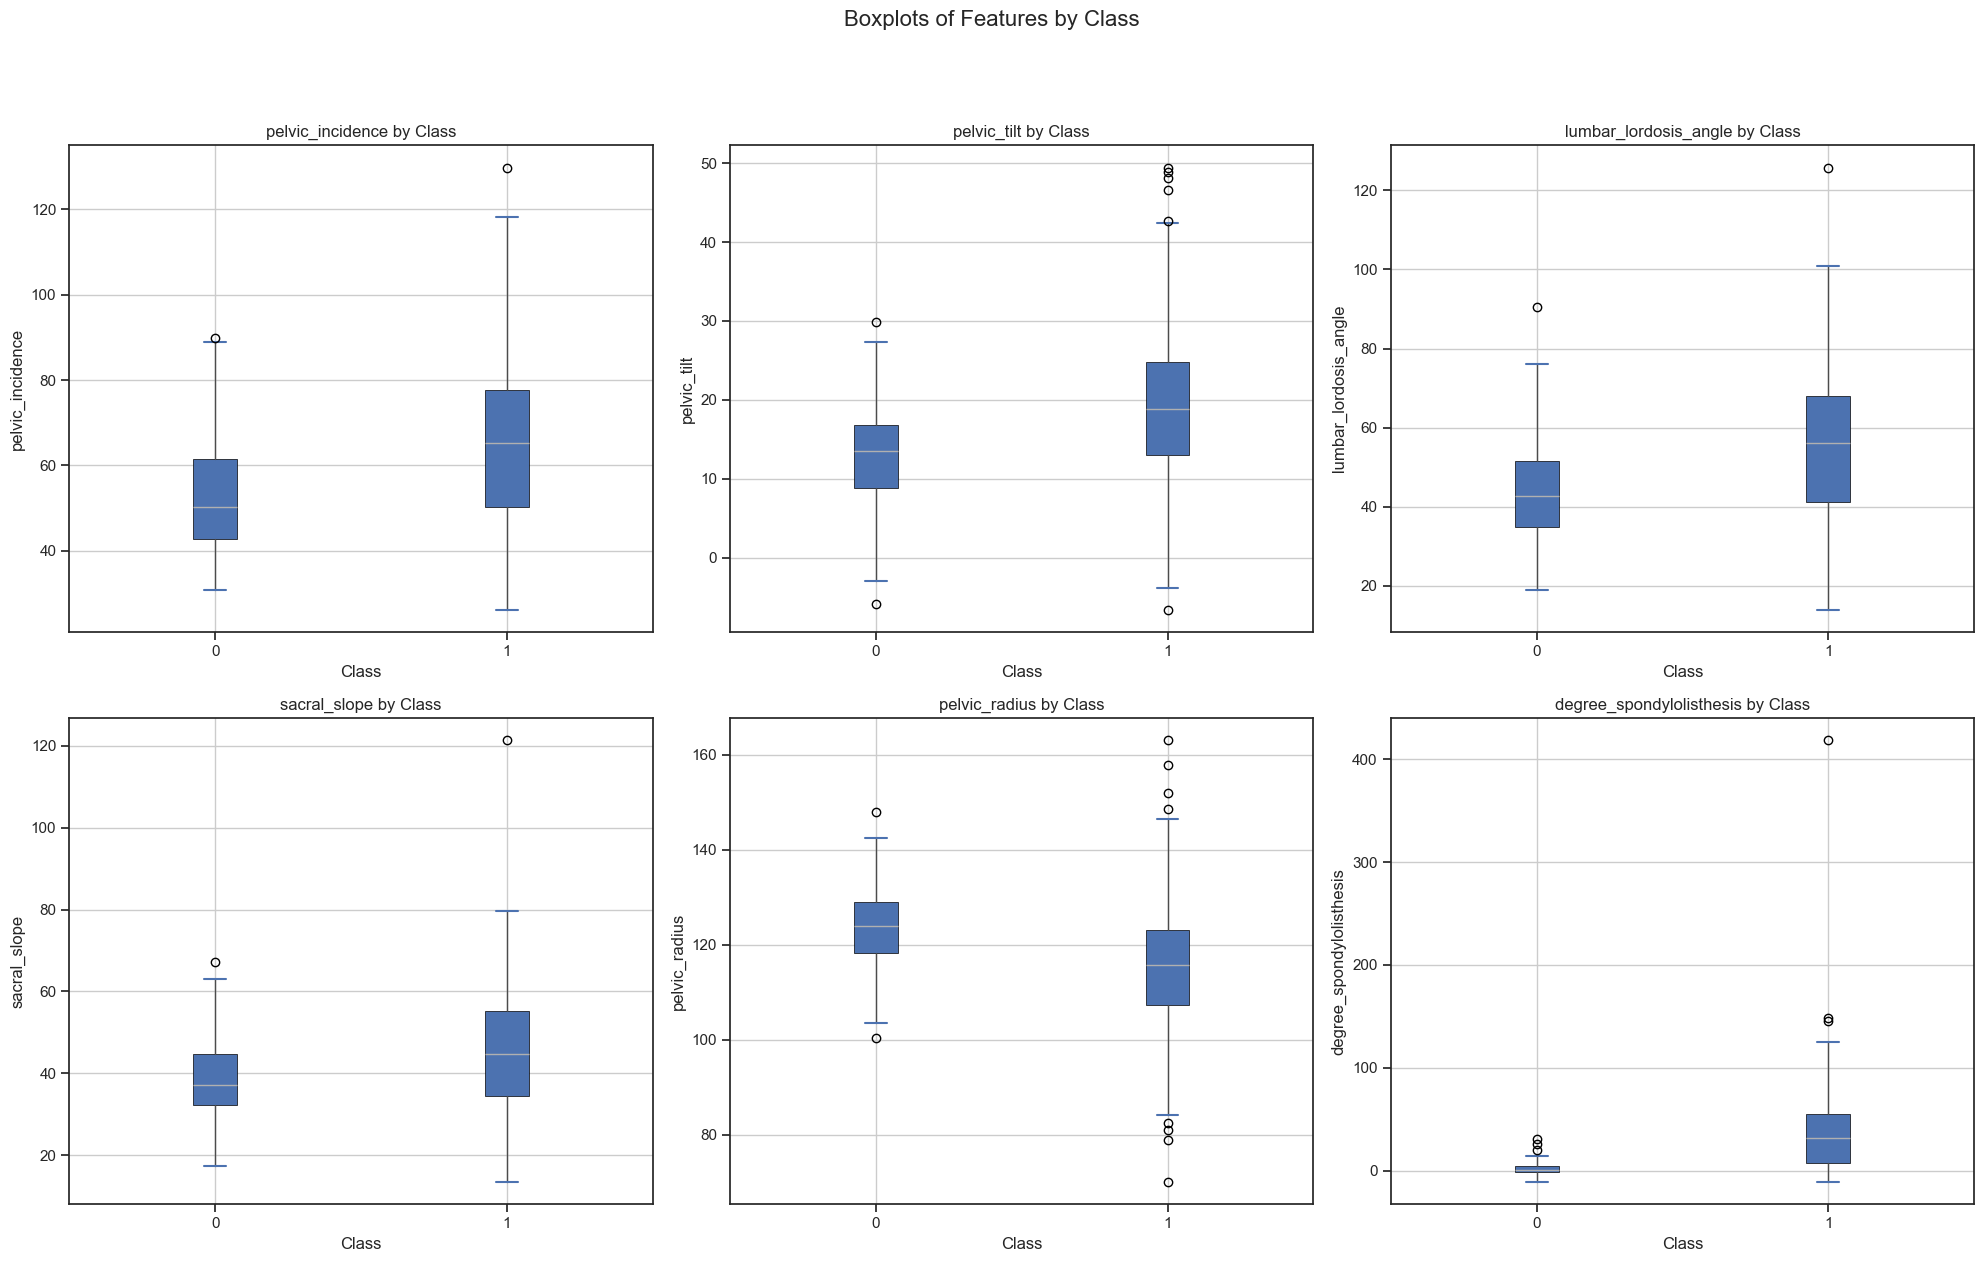

In [31]:
# List the six index features 
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

# Create a 2x3 grid of subplots (6 plots for 6 features)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Create boxplots for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    bp = df2.boxplot(column=feature, by='class', ax=ax, patch_artist=True, boxprops={"edgecolor": "black",
                          "linewidth": 0.5}, capprops={"color": "C0", "linewidth": 1.5})
    
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} by Class')

# Adjust the layout and show the plot
plt.tight_layout()
plt.suptitle('Boxplots of Features by Class', fontsize=16, y=1.05)
plt.show()


#### iii. Split Data Set

In [28]:
# First lets see the class distribution and if one class has more data points than another
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Test set class distribution:\n", y_test.value_counts(normalize=True))


Training set class distribution:
 class
1        0.666667
0        0.333333
dtype: float64
Test set class distribution:
 class
1        0.7
0        0.3
dtype: float64


Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [14]:
# Training set of Class 0
train_class0 = df2.loc[df2['class'] == 0][0:70]
# Trainig set of Class 1
train_class1 = df2.loc[df2['class'] == 1][0:140]

# Generate training set and shuffle it
train_set = pd.concat([train_class0, train_class1])
train_set = train_set.sample(frac=1)

# Generate x_train and y_train
x_train = train_set[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_train = train_set[['class']]

# Testing set of Class 0
class0_test = df2.loc[df2['class'] == 0][70:]
# Testing set of Class 1
class1_test = df2.loc[df2['class'] == 1][140:]

# Generate testing set and shuffle it
test_set = pd.concat([class0_test, class1_test])
test_set = test_set.sample(frac=1)

# Generate x_test and y_test
x_test = test_set[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_test = test_set[['class']]

### (c) Classification

#### i. Euclidean Metric

In [149]:
from sklearn.neighbors import KNeighborsClassifier

#### ii. Test all the data in the test dataset with k nearest neighbors. Take decisions my majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, ..., 7, 4, 1} (in reverse order). You can use smaller increments of k. 
#### Which k* is the most suitable k among those values? 
#### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1 score when k = k*. 

#### A common rule of thumb is that k = sqrt(N)/2. N is the number of samples in your training dataset ---> Researched this to help my understanding 

In [34]:
# Initialize the k list to store information
k_values = [i for i in range(208, 0, -3)]
train_errors = []
test_errors = []

# MSE measures the average squared difference between predicted and observed values (Read this in Chapter 2 of "An Introduction to Statistical Learning"). 
# Lower MSE = better model 
# However, MSE is calculated alongside RMSE to help with interpretibility. In this HW I didn't calculate RMSE
MSE = [] # Mean squared error

# Iterate through k
for k in k_values:
    # Create a KNeighborsClassifier model
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Fit the model to your scaled training data
    knn_model.fit(x_train, y_train.values.ravel())
    
    # Predict on the training data 
    y_pred_train = knn_model.predict(x_train)
    
    # Calculate the mean squared error 
    mse = mean_squared_error(y_train, y_pred_train)
    MSE.append(mse)

    # Obtain train and test errors
    train_errors.append(1 - knn_model.score(x_train, y_train))
    test_errors.append(1 - knn_model.score(x_test, y_test))

# # Print the results
print("K values:", np.mean(k_values))
print("Train errors:", np.mean(train_errors))
print("Test errors:", np.mean(test_errors))
print("Mean Squared Error:", np.mean(MSE))


K values: 104.5
Train errors: 0.22598639455782307
Test errors: 0.1965714285714286
Mean Squared Error: 0.2259863945578231


### Figure 4 - Train and Test Errors vs. K Values 

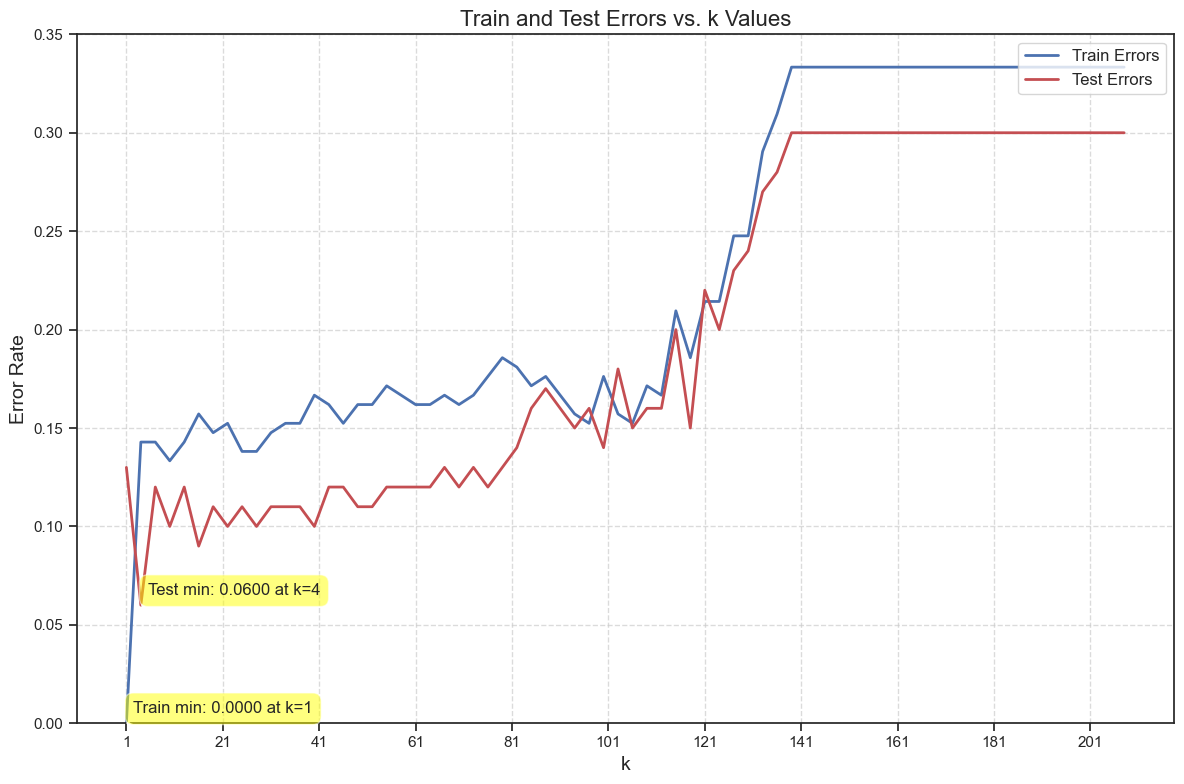

In [35]:
## Reference: Perplexity AI - I used the original code below and asked Perplexity how to improve it for better interpretability. 
# k_array = np.arange(1, 209, 3)
# best_error, best_k, training_error_data, testing_error_data = KNN(k_array, x_train, y_train, x_test, y_test)
# data = [[best_k[i], best_error[i]] for i in range(len(best_k))]
# dic['Euclidean'] = data

# plt.figure(figsize=(15,10))
# plt.plot(k_array, training_error_data, label='Training Error')
# plt.plot(k_array, testing_error_data, label='Testing Error')
# plt.xlabel('K')
# plt.ylabel('Error')
# plt.title('Training and Testing Error vs K')
# plt.legend()
# plt.show()

# Create a new figure with a specific size
plt.figure(figsize=(12, 8))

# Plot train and test errors with improved styling
plt.plot(k_values, train_errors, 'b-', linewidth=2, label='Train Errors')
plt.plot(k_values, test_errors, 'r-', linewidth=2, label='Test Errors')

# Add a title with a larger font size
plt.title('Train and Test Errors vs. k Values', fontsize=16)

# Label the axes with larger font sizes
plt.xlabel('k', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
plt.legend(loc="upper right", fontsize=12)

# Set the x-axis to show more tick marks
plt.xticks(np.arange(min(k_values), max(k_values)+1, 20))

# Adjust y-axis to start from 0
plt.ylim(bottom=0)

# Add annotations for minimum points
train_min = min(train_errors)
test_min = min(test_errors)
train_min_k = k_values[train_errors.index(train_min)]
test_min_k = k_values[test_errors.index(test_min)]

plt.annotate(f'Train min: {train_min:.4f} at k={train_min_k}', 
             xy=(train_min_k, train_min), xytext=(5, 5),
             textcoords='offset points', ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.annotate(f'Test min: {test_min:.4f} at k={test_min_k}', 
             xy=(test_min_k, test_min), xytext=(5, 5),
             textcoords='offset points', ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [37]:
# Find optimal k = k* where we have lowest test error
optimal_k = k_values[np.argmin(test_errors)]
print('The optimal k* is at k =', optimal_k)

The optimal k* is at k = 4


In [40]:
# Fit a KNN model with k = 4
knn_model_4 = KNeighborsClassifier(n_neighbors=4)

# Train model
knn_model_4.fit(x_train, y_train.values.ravel())

# Store predicted values
y_pred = knn_model_4.predict(x_test)

#### Confusion Matrix 

In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

acc_score 

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,25,5
Actual 1,1,69


Accuracy Score : 0.94


#### Classification Report and Calculating the TP and TN Rate
Classification report gives us precision score and F1 score as well

The documentation from sklearn.metrics.confusion_matrix tells us that in binary classification the true negatives is C[0][0], false negatives is C[1][0], true positives is C[1][1] and false positives is C[0][1]

In [42]:
# Use a classification report to evaluate the model using the predictions and testing data
# The classification report can give us the true positive and true negative rate because Recall = True Positive (TP)/True Positive (TP) + False Negative (FN)
# Recall is also known as true positive rate

classification_report = classification_report(y_test, y_pred)

# Print the classification report
print(classification_report)

# Find all the values needed
tn, fn, tp, fp = cm[0][0], cm[1][0], cm[1][1], cm[0][1]
# Calculate the true negative rate
TN_rate = tn/(tn + fp)
print('True Negative Rate:', TN_rate)
# Calculate the true positive rate
TP_rate = tp/(tp + fn)
print('True positive Rate:', TP_rate)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True Negative Rate: 0.8333333333333334
True positive Rate: 0.9857142857142858


#### iii. Learning Curve

#### Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30, ..., 210}

#### Note: For each N, select your training set by choosing the first [N/3] rows of Class 0 and the first N - [N/3] rows of Class 1 in the training set. 
#### Now for each N, select the optimal k from a set starting from k = 1, increasing by 5. 

In [47]:
# Initialize training set size
train_size = [i for i in range(10, 211, 10)]

# Initialize dictionary to store optimal k for each N
best_test_error= dict()

# Iterate through N
for N in train_size:
    # Choose the first [N/3] rows in Class 0
    sub0_train = train_class0[0:math.floor(N/3)] 
    # Choose the first N - [N/3] rows of Class 1 
    sub1_train = train_class1[0:(N-math.floor(N/3))] 

    # Generate sub set of training set and shuffle it
    subset_train = pd.concat([sub0_train, sub1_train])
    subset_train = subset_train.sample(frac=1)

    # Generate subset of x_train and subset of y_train
    sub_x_train = subset_train.drop('class', axis=1)
    sub_y_train = subset_train[['class']]
    
    # Initialize k values
    k_values = [j for j in range(1, N, 5)]
    # Initialize list to hold test error
    sub_test_errors = list()
    
    # Iterate through k values
    for k in k_values:
        subset_knn = KNeighborsClassifier(n_neighbors=k)  
        subset_knn.fit(sub_x_train, sub_y_train.values.ravel())  
        sub_test_errors.append(1-subset_knn.score(x_test, y_test))  
        
    # Find the lowest test error and store it with given N
    best_test_error[N] = min(sub_test_errors)

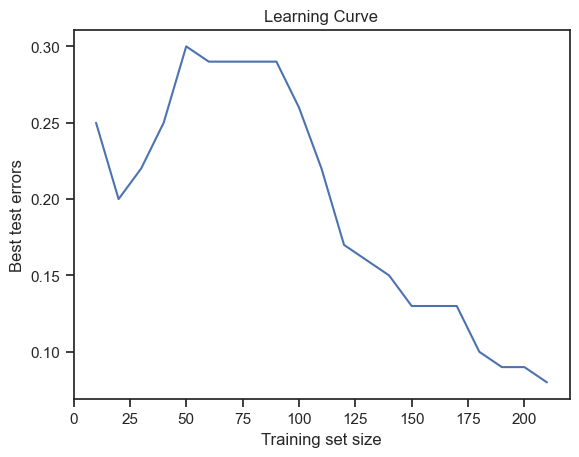

In [49]:
# Plot best test error rate
plt.plot(train_size, best_test_error.values())
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('Best test errors')

plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

Replace the Euclidean metric with the following metrics using sklearn.DistainceMetric and test them 
Summarize the test errors (i.e when k = k*) in a table 
Use all of your training data and select the best k when {1,6,11, ... , 196}

##### A. Manhattan Distance with p = 1.

In [50]:
# Initialize K values
k_values = np.arange(1, 197, 5)

# Use list comprehension to calculate test errors
test_errors = [
    1 - KNeighborsClassifier(n_neighbors=k, p=1).fit(x_train, y_train.values.ravel()).score(x_test, y_test)
    for k in k_values
]

# If you need the summarize_test_error dictionary
summarize_test_error = dict(zip(k_values, test_errors))

In [52]:
from tabulate import tabulate

# Find min test error at different k's
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print('k =', k_values[index], 'test error =', test_errors[index])

# Find the k value with the minimum test error
best_k = min(summarize_test_error, key=summarize_test_error.get)
best_error = summarize_test_error[best_k]

# Create a list of lists for tabulation
data = [[best_k, best_error]]

# Print the tabulated result
print(tabulate(data, headers=['Best_K', 'Error'], tablefmt='fancy_grid'))

k = 1 test error = 0.10999999999999999
k = 6 test error = 0.10999999999999999
k = 11 test error = 0.10999999999999999
k = 26 test error = 0.10999999999999999
╒══════════╤═════════╕
│   Best_K │   Error │
╞══════════╪═════════╡
│        1 │    0.11 │
╘══════════╧═════════╛


Here k = 1 give the least error, however, this would be because it overfits the data so for the second part we will ideally use k = 6. 

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [53]:
# Define the range of log10(p) values specified in the homework 
log10_p_values = np.arange(0.1, 1.1, 0.1)

# Convert log10(p) to p values: This makes it more interpretable 
p_values = 10**log10_p_values 

# Initialize lists to store results 
test_errors = []

# Set K* to 6 as found for Manhattan distance 
k_star = 6 

# Iterate through p values 
for p in p_values: 

    # Create KNN classifier with Minknowski distance 
    knn = KNeighborsClassifier(n_neighbors = k_star, p = p)

    # Fit the model and calculate test error
    knn.fit(x_train, y_train.values.ravel())
    test_error = 1 - knn.score(x_test, y_test)
    test_errors.append(test_error)

# Find the best log10(p)
best_log10_p_index = np.argmin(test_errors)
best_log10_p = log10_p_values[best_log10_p_index]
best_error = test_errors[best_log10_p_index]

# Find min test error at different p's
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print(f'p = {p_values[index]:.5f}')


print(f"Best log10(p): {best_log10_p:.4f}")
print(f"Best test error: {best_error:.4f}")

p = 3.98107
Best log10(p): 0.6000
Best test error: 0.0600


In [54]:
# Prepare the data
data = [
    ["p", 3.98107],
    ["Best log10(p)", 0.6000],
    ["Best test error", 0.0600]
]

# Create the table
table = tabulate(data, headers=["Metric", "Value"], tablefmt="fancy_grid")

# Print the table
print(table)

╒═════════════════╤═════════╕
│ Metric          │   Value │
╞═════════════════╪═════════╡
│ p               │ 3.98107 │
├─────────────────┼─────────┤
│ Best log10(p)   │ 0.6     │
├─────────────────┼─────────┤
│ Best test error │ 0.06    │
╘═════════════════╧═════════╛


##### C. Chebyshev Distance With p -> infinity.

In [168]:
# Initialize K values 
k_values = [i for i in range(1, 197, 5)]
test_errors = list()

# Iterate through k values 
for k in k_values: 

    # Create KNN classifier with Chebyshev Distance where p = infinity
    knn_chebyshev = KNeighborsClassifier(n_neighbors = k, p = math.inf)

    # Fit the model and calculate test error
    knn_chebyshev.fit(x_train, y_train.values.ravel())
    test_error = 1 - knn_chebyshev.score(x_test, y_test)
    test_errors.append(test_error)

# Find the minimum test error at different values of k 
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print(f'k = {k_values[index]:.5f}, test error = {test_errors[index]:.7f}')

k = 16.00000, test error = 0.0800000


#### ii. Mahalanobis Distance.

In [55]:
# Obtain covariance matrix of data
x = x_train.transpose()
y = np.cov(x_train, rowvar=False)
vi = np.linalg.pinv(y)

# Initialize K values
k_values = [i for i in range(1, 197, 5)]
test_errors = list()

# Iterate over k
for k in k_values:
    # Declare KNN with Mahalanobis Distance
    knn_mahalanobis = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': vi})
                                            
    # Train model
    knn_mahalanobis.fit(x_train, y_train.values.ravel())

    # Obtain test error
    test_errors.append(1-knn_mahalanobis.score(x_test, y_test))

# Find the min test error at different k's
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print(f'k = {k_values[index]:.5f}, test error = {test_errors[index]:.7f}')

k = 1.00000, test error = 0.1500000


### (e) Weighted Decision

The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k {1,6,11,16, ..., 196}

#### Euclidean

In [134]:
# Initialize K values 
k_value = [i for i in range(1, 197, 5)]

In [140]:
test_errors = list()

# Iterate through k values 
for k in k_values: 

    # Create KNN classifier with Euclidean distance 
    knn_euclidean = KNeighborsClassifier(n_neighbors = k, weights = 'distance')

    # Fit the model and calculate test error
    knn_euclidean.fit(x_train, y_train.values.ravel())
    test_error = 1 - knn_euclidean.score(x_test, y_test)
    test_errors.append(test_error)

# Find the minimum test error at different values of k 
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print(f'k = {k_values[index]:.5f}, test error = {test_errors[index]:.9f}')

k = 6.00000, test error = 0.100000000


#### Manhattan 

In [136]:
test_errors = list()

# Iterate through k values 
for k in k_values: 

    # Create KNN classifier with Manhattan distance 
    knn_manhattan = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p=1)

    # Fit the model and calculate test error
    knn_manhattan.fit(x_train, y_train.values.ravel())
    test_error = 1 - knn_manhattan.score(x_test, y_test)
    test_errors.append(test_error)

# Find the minimum test error at different values of k 
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print(f'k = {k_values[index]:.5f}, test error = {test_errors[index]:.7f}')

k = 26.00000, test error = 0.1000000


#### Chebyshev

In [138]:
test_errors = list()

# Iterate through k values 
for k in k_values: 

    # Create KNN classifier with Chebyshev distance 
    knn_chebyshev = KNeighborsClassifier(n_neighbors = k, weights='distance', p = math.inf)

    # Fit the model and calculate test error
    knn_chebyshev.fit(x_train, y_train.values.ravel())
    test_error = 1 - knn_chebyshev.score(x_test, y_test)
    test_errors.append(test_error)

# Find the minimum test error at different values of k 
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print(f'k = {k_values[index]:.5f}, test error = {test_errors[index]:.7f}')

k = 16.00000, test error = 0.1100000
k = 31.00000, test error = 0.1100000
k = 36.00000, test error = 0.1100000
k = 41.00000, test error = 0.1100000
k = 61.00000, test error = 0.1100000


### (f) Training Error Rate

In [143]:
# Prepare the data
data = [
    ["Euclidean", 6, 0.1000],
    ["Manhattan", 26, 0.1000],
    ["Chebyshev", 16, 0.1100]
]

# Create the table
table = tabulate(data, headers=["Distance Metric", "Best K", "Test Error"], tablefmt="fancy_grid")

# Print the table
print(table)


╒═══════════════════╤══════════╤══════════════╕
│ Distance Metric   │   Best K │   Test Error │
╞═══════════════════╪══════════╪══════════════╡
│ Euclidean         │        6 │         0.1  │
├───────────────────┼──────────┼──────────────┤
│ Manhattan         │       26 │         0.1  │
├───────────────────┼──────────┼──────────────┤
│ Chebyshev         │       16 │         0.11 │
╘═══════════════════╧══════════╧══════════════╛


#### Understanding our Lowest Training Error Rate
The lowest training error rate achieved was with the Euclidean Metric with a best k at 6 and a test error of 0.1. 


#### References 
sklearn.metrics.confusion_matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

sklearn.metrics.precision_score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

sklearn.metrics.classification_report https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

sklearn.neighbors.KNeighborsClassifier https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Seaborn Statistical Data Visualization https://seaborn.pydata.org/examples/scatterplot_matrix.html

Tabulate Documentation https://pypi.org/project/tabulate/

Perplexity AI 
Specific Questions that were asked to solve code errors or further explain a concept 

1. Used Perplexity AI in order to open the '.arff' file. I had a few issues and Perplexity fixed and explained how to open this type of file using 'import os'. In the future, I know now to use the '.dat' file because its easier and can be opened with pandas. 

1. Explain how the Euclidean metric works specifically within a KNN model. In what ways can this metric be more beneficial within our model? 

2. Explain why we are most likely to see a decline in the Learning Curve over a bigger training set size. Now connect this to why we might want to training on smaller subsets of the training data. 

3. What is the importance of standardizing our data before applying KNN? Is it absolutely necessary or can I receive a reliable model results without doing so?  

4. How can I improve this graph involving Traing and Test Error vs. K Values (Figure 5)
